# pvops Functionality Tutorial



In [1]:
import text_class_example

import sys
sys.path.append('..')
from pvops.text import utils

#import text2series_class_example  ; uncomment when completed
import pandas as pd
import matplotlib.pyplot as plt

## Problem statements:

### 1. Text Preprocessing
Process the documents into concise, machine learning-ready documents. Additionally, extract dates from the text.

### 2. Text Classification
The written tickets are used to make an inference on the specified event descriptor.


## Text processing 

### Import text data

In [2]:
folder = 'example_data//'
filename = 'example_ML_ticket_data.csv'
df = pd.read_csv(folder+filename)
df.head(n=3)

,Date_EventStart,Date_EventEnd,Asset,CompletionDesc,Cause,ImpactLevel,randid
0,8/16/2018 9:00,8/22/2018 17:00,Combiner,cb 1.18 was found to have contactor issue woul...,0000 - Unknown.,Underperformance,38
1,9/17/2018 18:25,9/18/2018 9:50,Pad,self resolved. techdispatched: no,004 - Under voltage.,Underperformance,46
2,8/26/2019 9:00,11/5/2019 17:00,Facility,"all module rows washed, waiting for final repo...",0000 - Unknown,Underperformance,62


### Establish settings

Specify column names which will be used in this pipeline.

In [3]:
DATA_COLUMN = "CompletionDesc"   # Contains document
LABEL_COLUMN = "Asset"           # Establish event descriptor which will be inferenced by classifiers
DATE_COLUMN = 'Date_EventStart'  # Date of ticket (start date, end date; any reflective date will do), used in date extracting pipeline to replace information not specified in ticket

### Step 0: If needed, map raw labels to a cleaner set of labels

This step is 

In [4]:
asset_remap_filename = 'remappings_asset.csv'
REMAPPING_COL_FROM = 'in'
REMAPPING_COL_TO = 'out_'
remapping_df = pd.read_csv(folder+asset_remap_filename)

In [5]:
remapping_col_dict = {
    'attribute_col': LABEL_COLUMN,
    'remapping_col_from': REMAPPING_COL_FROM,
    'remapping_col_to': REMAPPING_COL_TO
}

df_remapped_assets = utils.remap_attributes(df, remapping_df, remapping_col_dict)

df = df_remapped_assets

Original attribute distribution:
Facility                  37
Inverter                  34
Tracker                    8
Combiner                   7
Substation                 3
Met station                2
Energy Storage/Battery     1
Module                     1
Summary                    1
Ground-Mount PV System     1
Transformer                1
Pyranometer                1
String                     1
Pad                        1
Meter                      1
Name: Asset, dtype: int64
Final attribute distribution:
facility        37
inverter        34
tracker          8
combiner         7
met station      3
substation       3
module           2
energy meter     2
other            2
transformer      2
Name: Asset, dtype: int64


In [6]:
df[LABEL_COLUMN].value_counts()

facility        37
inverter        34
tracker          8
combiner         7
met station      3
substation       3
module           2
energy meter     2
other            2
transformer      2
Name: Asset, dtype: int64

### Step 1: Establish example instance and render preliminary information about the tickets

In [7]:
# Establish the class object (found in text_class_example.py)
print(df[LABEL_COLUMN].value_counts())

e = text_class_example.Example(df, LABEL_COLUMN)
e.summarize_text_data(DATA_COLUMN)

facility        37
inverter        34
tracker          8
combiner         7
met station      3
substation       3
module           2
energy meter     2
other            2
transformer      2
Name: Asset, dtype: int64
DETAILS
  100 samples
  0 invalid documents
  33.52 words per sample on average
  Number of unique words 1213
  3352.00 total words


### Visualize timeseries of ticket publications

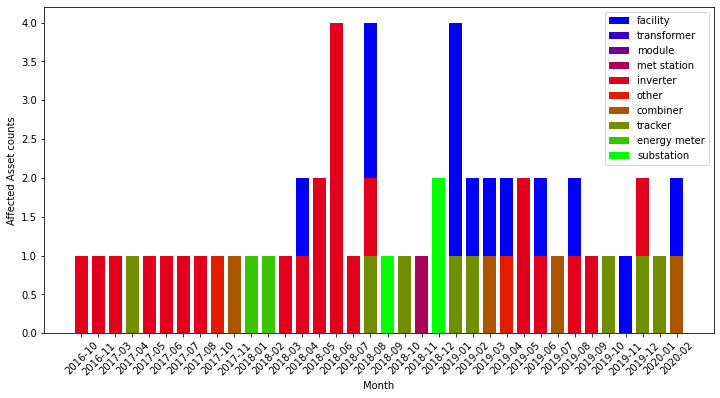

In [8]:
fig = e.visualize_attribute_timeseries(DATE_COLUMN)
plt.show()

### Functionality 1.1: Extract dates

In [9]:
# Extract date from ticket, if any. This framework is not 100% correct.
dates_df = e.extract_dates(DATA_COLUMN, DATE_COLUMN, SAVE_DATE_COLUMN='ExtractedDates')
dates_df

,CompletionDesc,ExtractedDates
0,cb 1.18 was found to have contactor issue woul...,[]
1,self resolved. techdispatched: no,[]
2,"all module rows washed, waiting for final repo...",[2019-09-01 09:00:00]
3,14 nov: we were alerted that e-c3-1 had faulte...,"[2017-11-14 07:46:00, 2017-03-01 07:46:00]"
4,assessed condition filters all inverters. litt...,[]
...,...,...
95,cleared cleared alert however psi is -3 invert...,[2016-11-03 09:28:00]
96,c4 closed remotely. techdispatched: no,[]
97,pure power fixed damaged source circuits did f...,"[2019-04-16 09:00:00, 2019-03-16 15:15:00]"
98,checked network connection to rm-1 didn't see ...,[]


### Functionality 1.2: Preprocess data for the Machine Learning classification

In [10]:
preprocessed_df = e.prep_data_for_ML(DATA_COLUMN, DATE_COLUMN)
preprocessed_df

,CompletionDesc,CleanDesc
0,[no completion notes were entered servicemax]....,completion notes entered servicemax techdispat...
1,assessed condition filters all inverters. litt...,assessed condition filters inverters little cl...
2,750. techdispatched: no,techdispatched
3,"all module rows washed, waiting for final repo...",module rows washed waiting final report sun power
4,"10/2/19 e-1, row 51, e1-3-51-1. tracker tracki...",row tracker tracking wrong lubed gear boxes tr...
...,...,...
95,replaced filters all inverters.,replaced filters inverters
96,replaced modem. c4 could not see it. i called ...,replaced modem could see called contact suppor...
97,"arrived site, performed tasks, everything chec...",arrived site performed tasks everything checke...
98,upon arrival cb 2.7 was offline with board tri...,upon arrival cb offline board tripped lead boa...


### Results of text processing

In [11]:
print("Pre-text processing")
e.summarize_text_data(DATA_COLUMN)

print("\nPost-text processing")
e.summarize_text_data('CleanDesc')

Pre-text processing
DETAILS
  100 samples
  0 invalid documents
  33.52 words per sample on average
  Number of unique words 1213
  3352.00 total words

Post-text processing
DETAILS
  100 samples
  0 invalid documents
  20.66 words per sample on average
  Number of unique words 729
  2066.00 total words


### Visualizing entropy of clustering technique pre- and post- processing

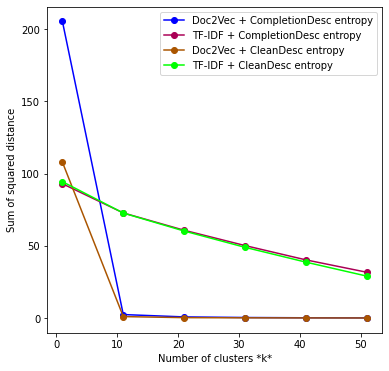

In [12]:
fig = e.visualize_cluster_entropy([DATA_COLUMN, 'CleanDesc'])
plt.show()

### Functionality 1.3: Frequency plot

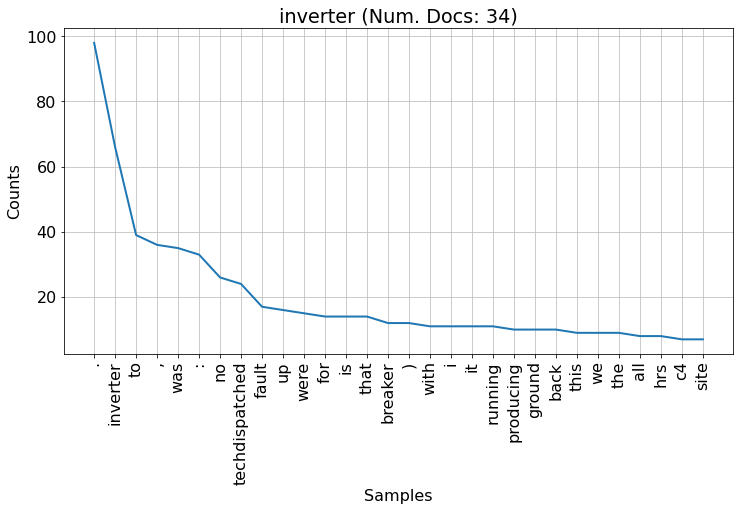

In [13]:
# Frequency plot on unprocessed data
fig = e.visualize_freqPlot(LBL_CAT='inverter', DATA_COLUMN=DATA_COLUMN)
plt.show()

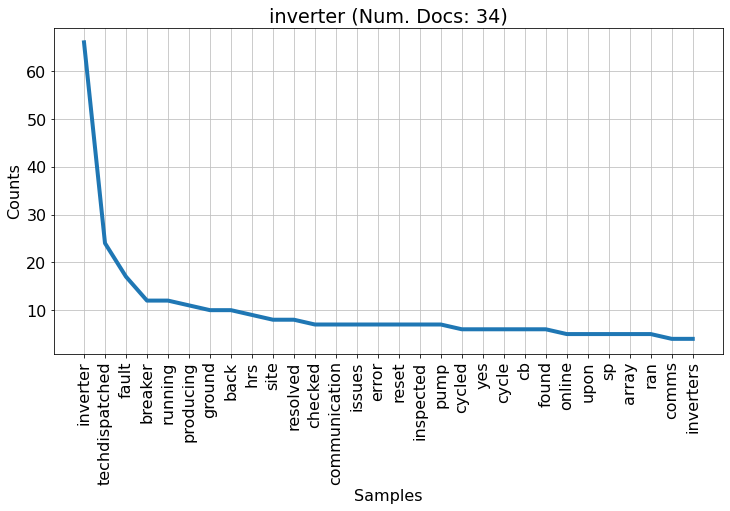

In [14]:
# Frequency plot on processed data
fig = e.visualize_freqPlot(LBL_CAT='inverter',
                            # Optional, kwargs into nltk's FreqDist
                            graph_aargs = {
                                'linewidth':4
                            }
                        )
plt.show()

### Hint: Use the below code to visualize frequency plots for all assets
    
    set_labels = list(set(e.df[e.LABEL_COLUMN].tolist()))
    for lbl in set_labels:
        fig = e.visualize_freqPlot(LBL_CAT=lbl)
        plt.show()

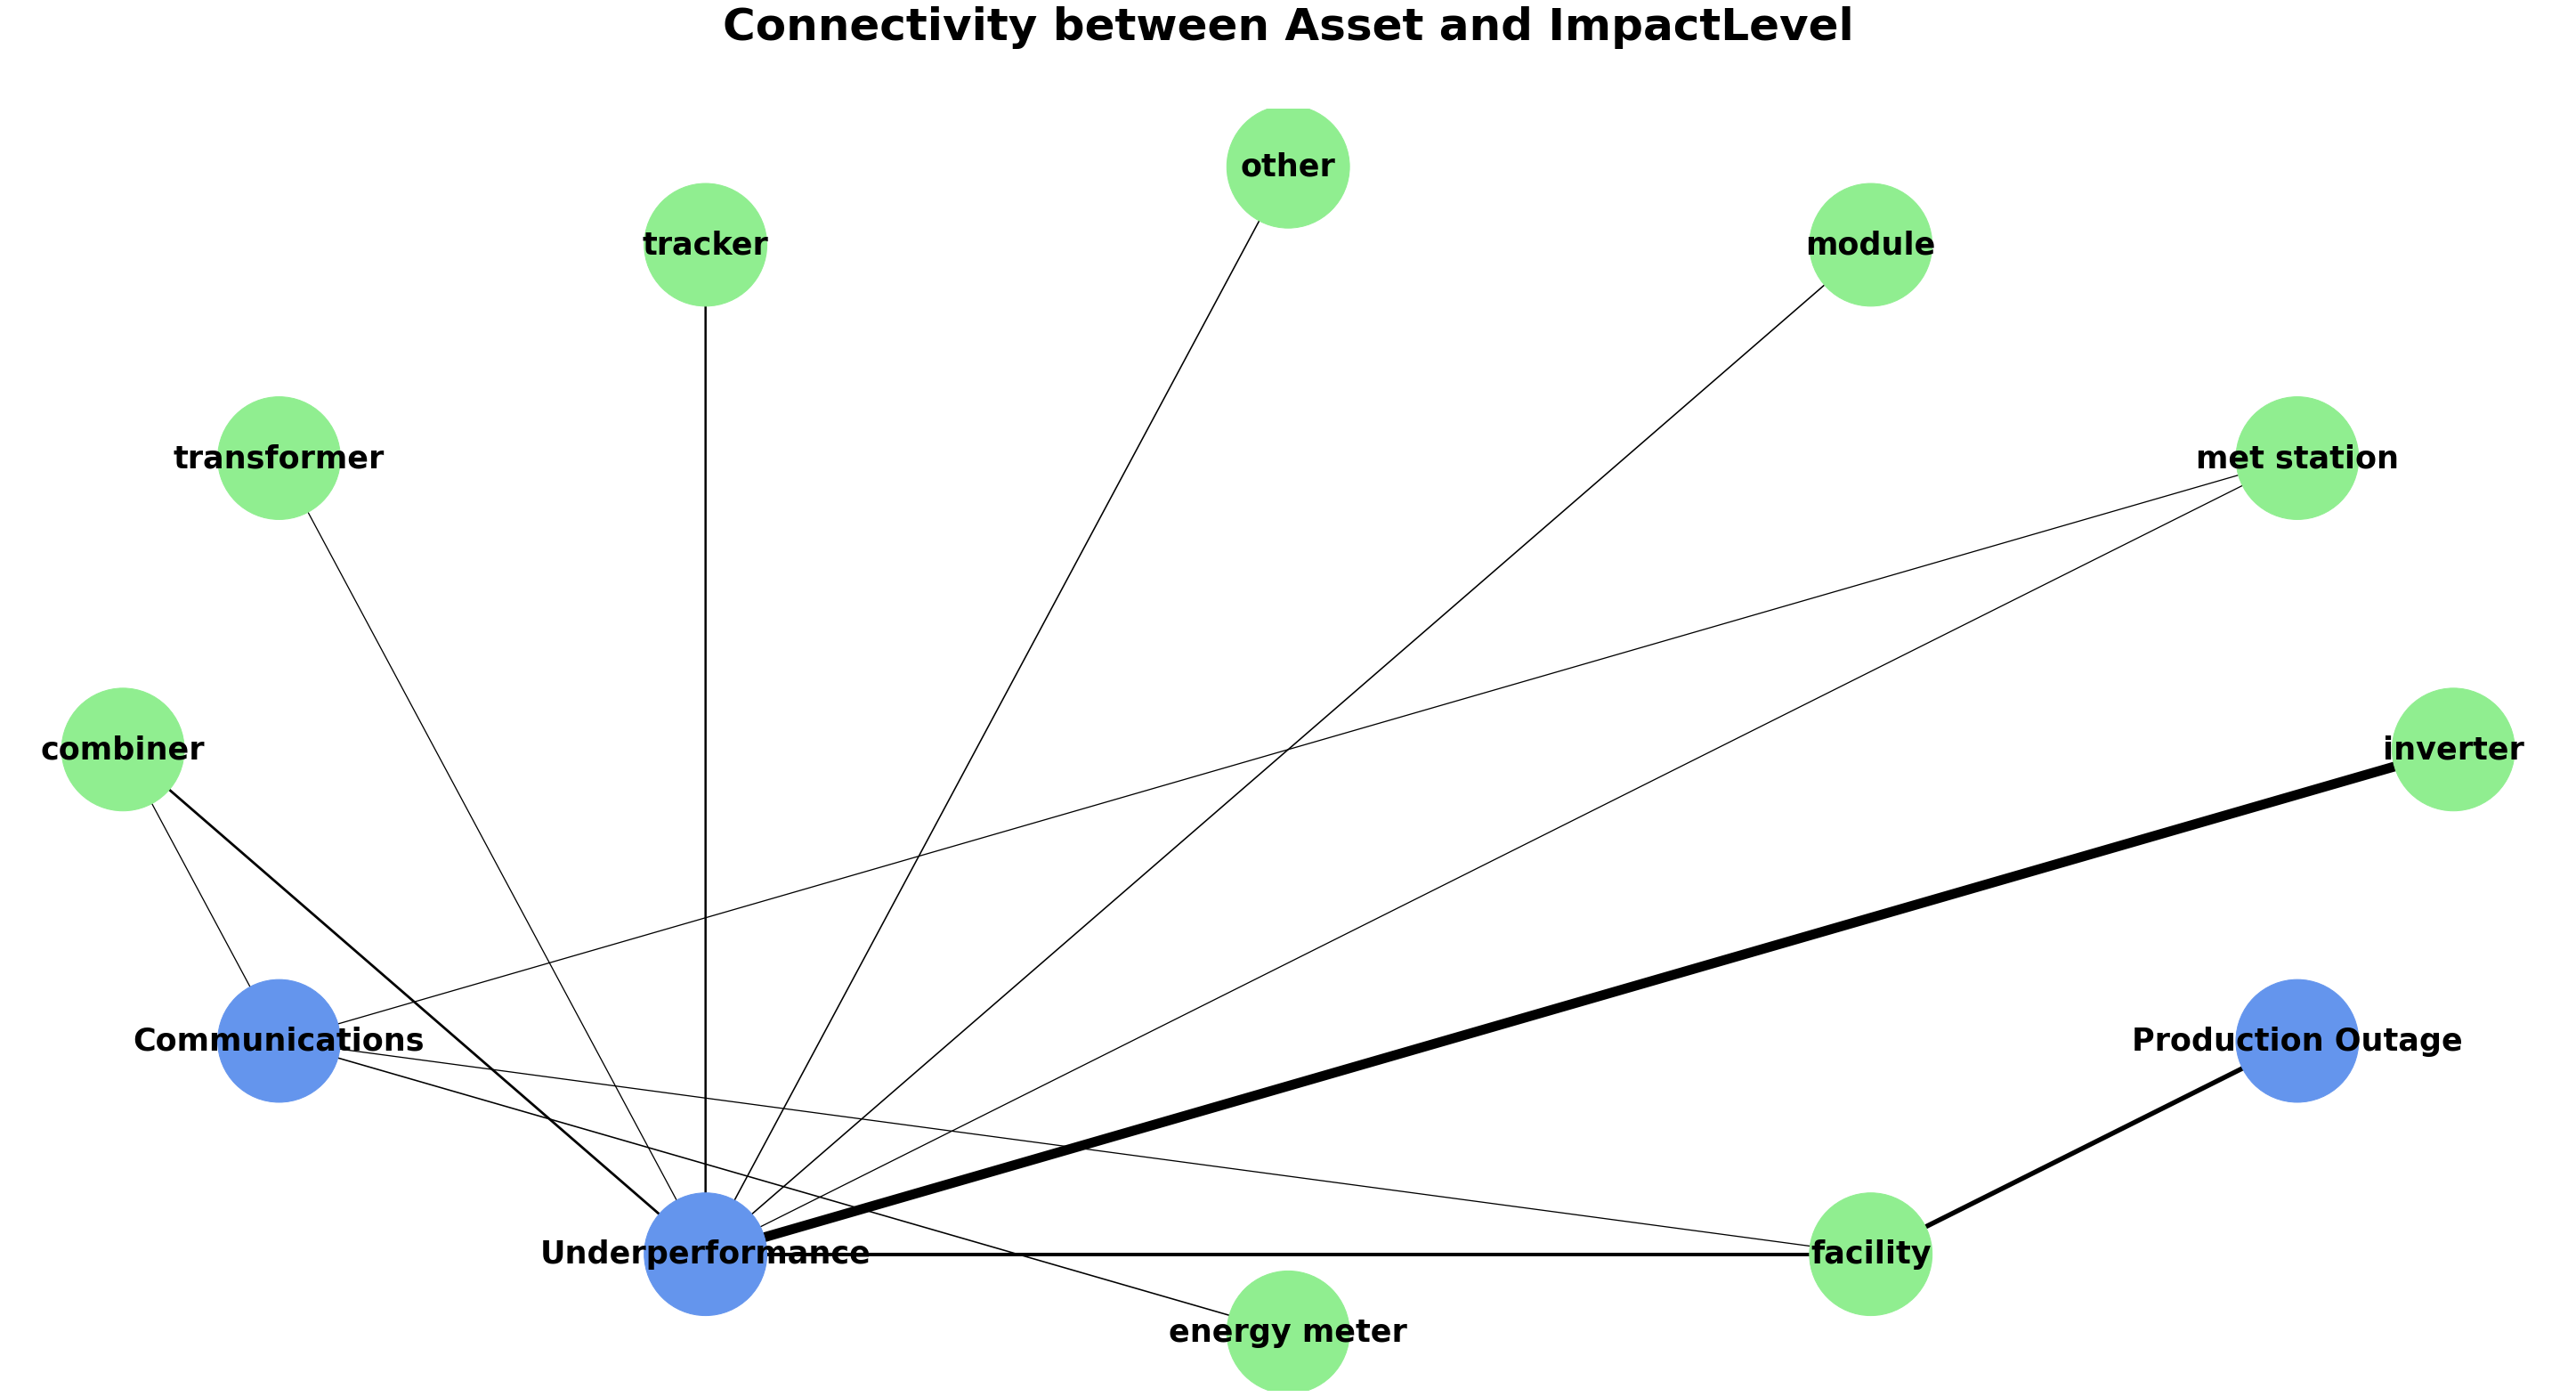

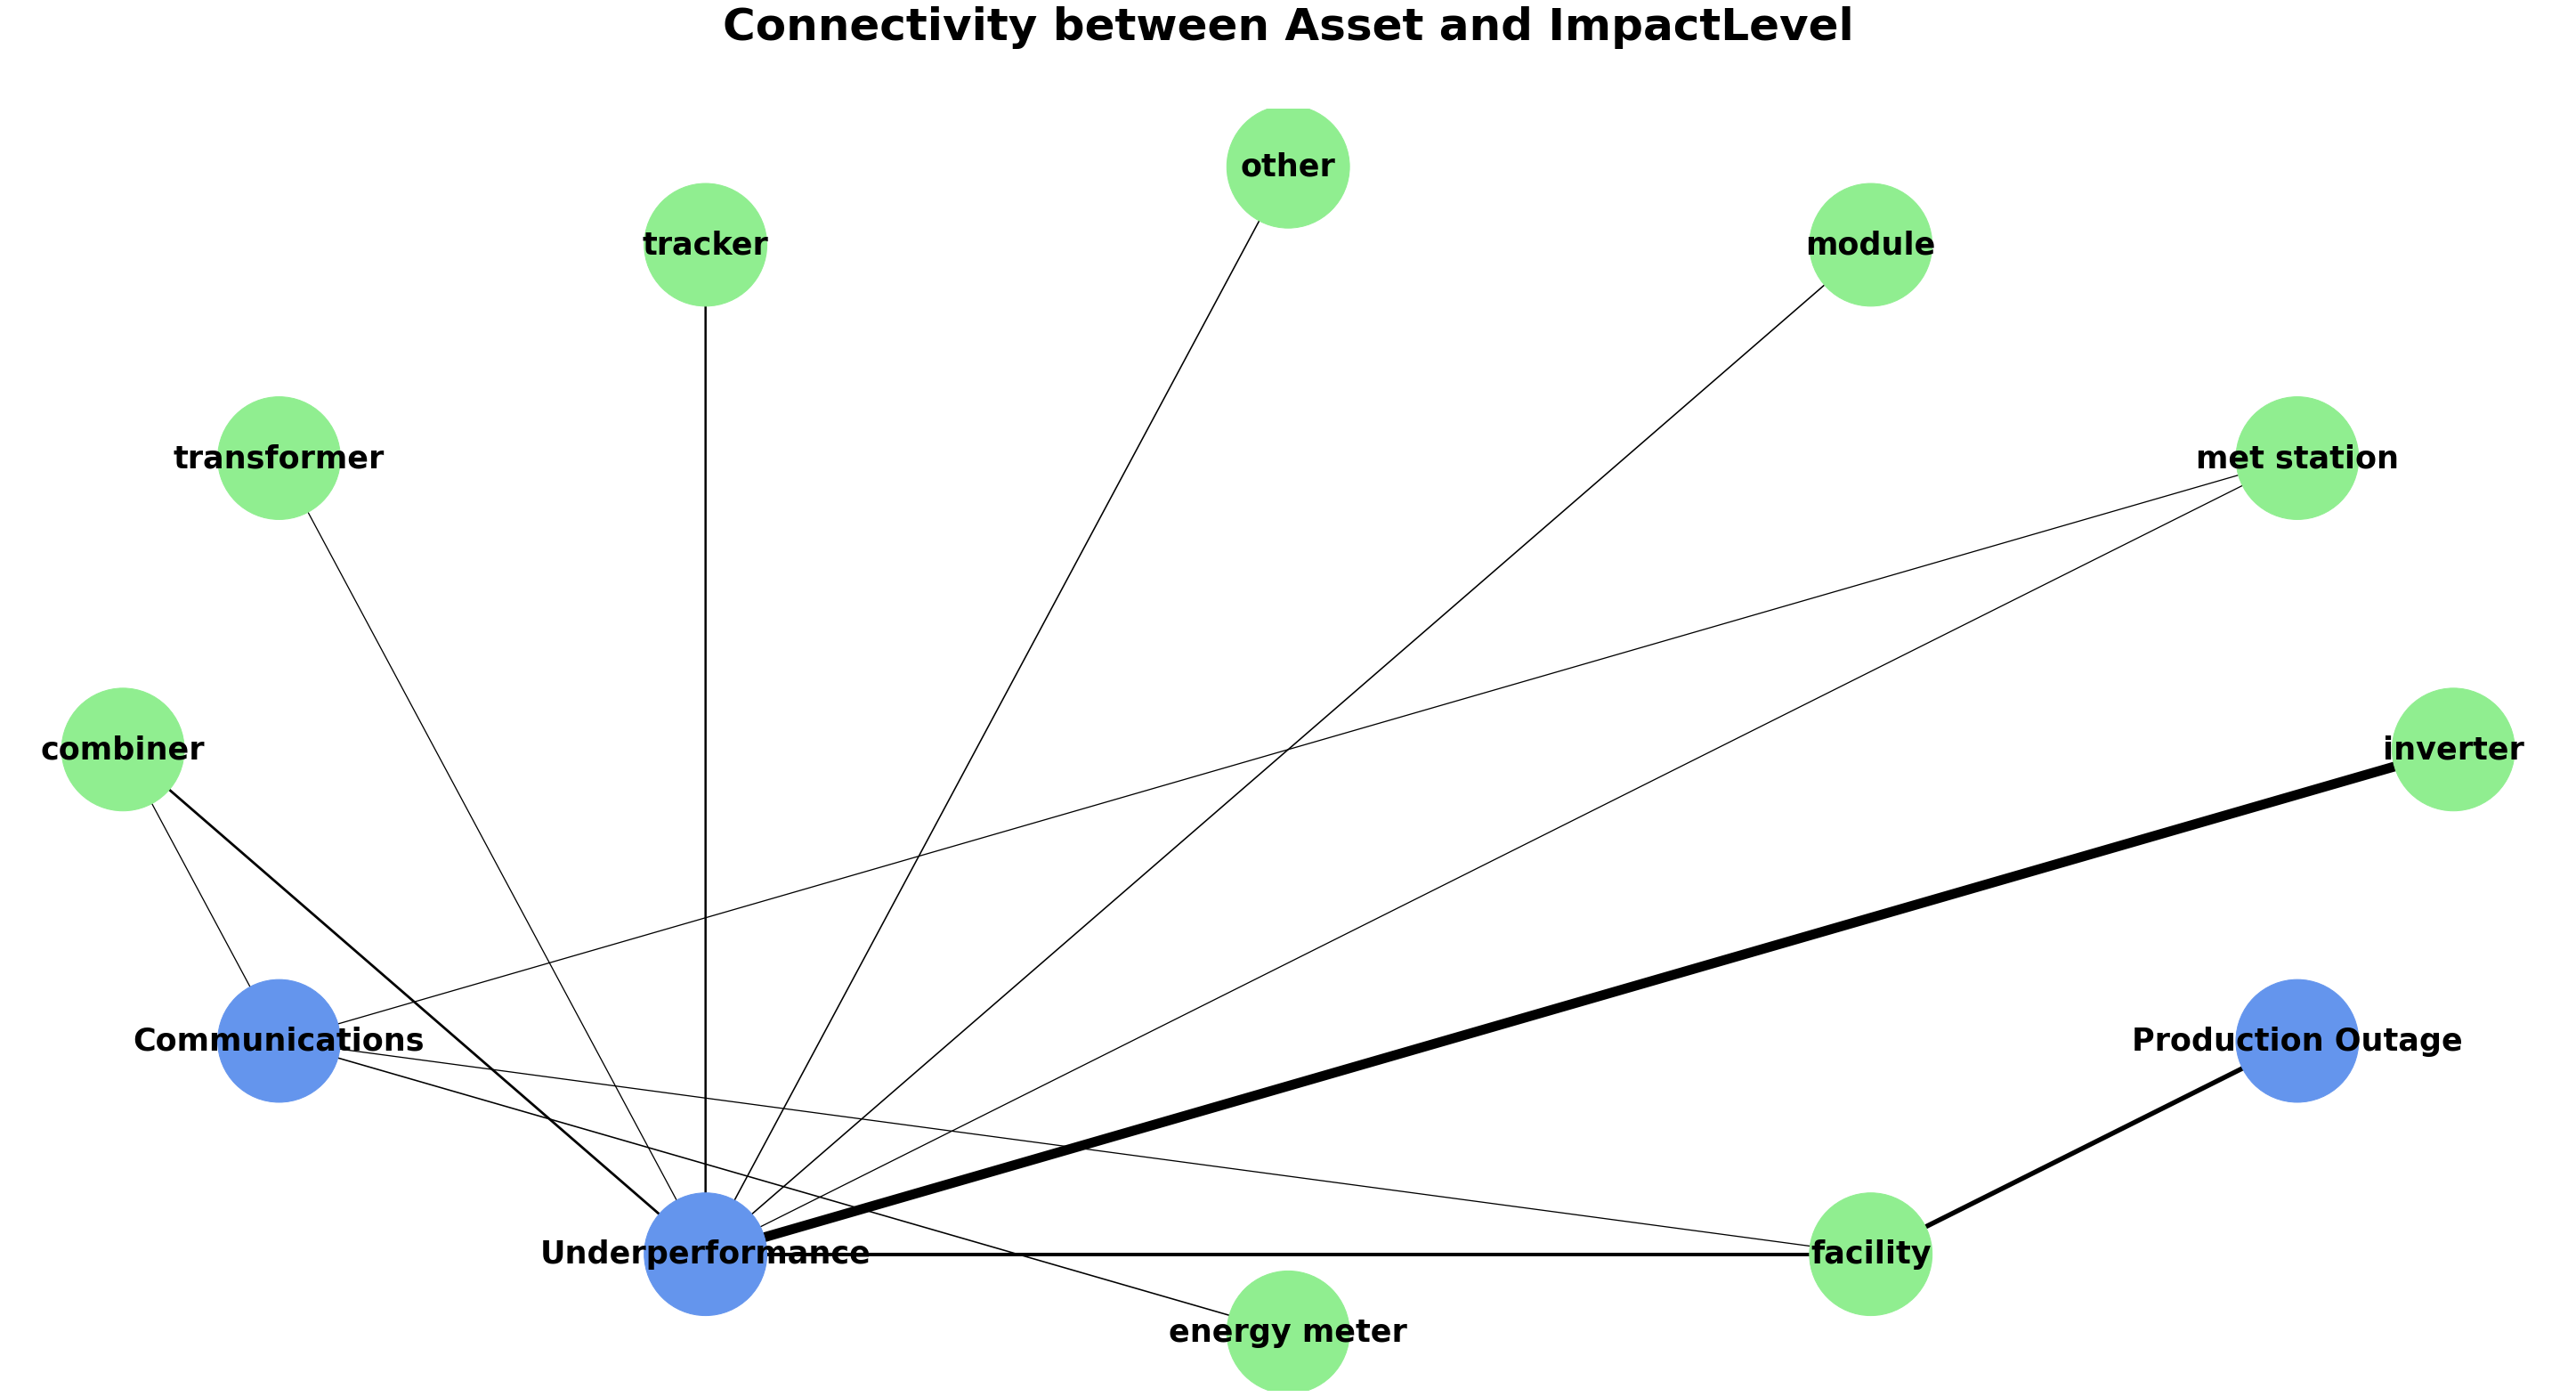

In [15]:
# Only supports two attributes
om_col_dict = {
    'attribute1_col': 'Asset',
    'attribute2_col': 'ImpactLevel'
}

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
)
plt.show()

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
    )
plt.show()

### Functionality 2.1: Conduct supervised classification on tickets using a cross-validated grid search

In [16]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_supervised(n_cv_splits=2, embedding='doc2vec')
print('best_model', best_model)
results

Starting ML analysis with Doc2Vec embeddings
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\b

,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__C,clf__max_iter,doc2vec__epochs,doc2vec__vector_size,...,clf__alpha,clf__batch_size,clf__hidden_layer_sizes,clf__learning_rate,clf__solver,clf__loss,clf__normalize,clf__n_estimators,clf__max_samples,clf__algorithm
197,RidgeClassifier,0.327576,0.328847,0.330119,0.00127141,0.347001,NaN,NaN,30,40,...,0.001,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
219,SGDClassifier,0.162205,0.324544,0.486884,0.16234,0.246996,NaN,NaN,30,100,...,0.01,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
202,RidgeClassifier,0.30641,0.32426,0.342109,0.0178496,0.3425,NaN,NaN,30,100,...,0.001,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
33,MLPClassifier,0.258324,0.323305,0.388285,0.0649801,1.252,NaN,1000,30,40,...,0.01,auto,"(100,)",adaptive,adam,NaN,NaN,NaN,NaN,NaN
258,BaggingClassifier,0.281785,0.312197,0.342609,0.0304119,0.627001,NaN,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,PassiveAggressiveClassifier,0.00679245,0.00932215,0.0118519,0.0025297,0.333001,0,NaN,30,40,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
161,PassiveAggressiveClassifier,0.00679245,0.00932215,0.0118519,0.0025297,0.331001,0,NaN,30,40,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
162,PassiveAggressiveClassifier,0.00679245,0.00932215,0.0118519,0.0025297,0.320499,0,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
157,PassiveAggressiveClassifier,0.00679245,0.00932215,0.0118519,0.0025297,0.313503,0,NaN,30,40,...,NaN,NaN,NaN,NaN,NaN,hinge,NaN,NaN,NaN,NaN


### Functionality 1.4: Conduct unsupervised clustering  on tickets using a cross-validated grid search

In [17]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_unsupervised(n_cv_splits=2, embedding='doc2vec')
print('best_model', best_model)
results

Starting ML analysis with Doc2Vec embeddings
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\cluster\_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (10). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: 

,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__damping,clf__max_iter,doc2vec__epochs,doc2vec__vector_size,doc2vec__window,clf__branching_factor,clf__n_clusters,clf__threshold,clf__init,clf__n_init,clf__bandwidth,clf__bin_seeding
58,KMeans,0.304215,0.325436,0.346657,0.021221,0.471002,NaN,NaN,30,100,5,NaN,10,NaN,random,50,NaN,NaN
47,KMeans,0.242306,0.314168,0.38603,0.0718618,0.634501,NaN,NaN,30,100,10,NaN,10,NaN,k-means++,50,NaN,NaN
57,KMeans,0.259153,0.303834,0.348515,0.0446809,0.4615,NaN,NaN,30,40,10,NaN,10,NaN,random,50,NaN,NaN
61,KMeans,0.2281,0.303038,0.377976,0.0749377,0.659002,NaN,NaN,30,40,10,NaN,10,NaN,random,100,NaN,NaN
44,KMeans,0.233452,0.301244,0.369036,0.0677921,0.613,NaN,NaN,30,40,5,NaN,10,NaN,k-means++,50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Birch,-9.76892e-17,-4.88446e-17,0,4.88446e-17,0.395503,NaN,NaN,30,40,10,50,10,0.75,NaN,NaN,NaN,NaN
20,Birch,-9.76892e-17,-4.88446e-17,0,4.88446e-17,0.375498,NaN,NaN,30,40,5,50,10,0.75,NaN,NaN,NaN,NaN
19,Birch,-9.76892e-17,-4.88446e-17,0,4.88446e-17,0.342,NaN,NaN,30,100,10,50,10,0.5,NaN,NaN,NaN,NaN
18,Birch,-9.76892e-17,-4.88446e-17,0,4.88446e-17,0.345501,NaN,NaN,30,100,5,50,10,0.5,NaN,NaN,NaN,NaN


In [18]:
e.predict_best_model(ml_type = 'supervised')

Best algorithm found:
 Pipeline(memory=None,
         steps=[('doc2vec',
                 Doc2VecModel(callbacks=None, comment=None, dbow_words=0, dm=1,
                              dm_concat=0, dm_mean=None, dm_tag_count=1,
                              dv=None, dv_mapfile=None, epochs=30,
                              trim_rule=None, vector_size=40, window=10)),
                ('clf',
                 RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 normalize=False, random_state=None,
                                 solver='auto', tol=0.001))],
         verbose=False)
Predictions stored to Supervised_Pred_Asset in `df` attribute
Score: 0.6876993154805455
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an i

In [19]:
e.predict_best_model(ml_type = 'unsupervised')

Best algorithm found:
 Pipeline(memory=None,
         steps=[('doc2vec',
                 Doc2VecModel(callbacks=None, comment=None, dbow_words=0, dm=1,
                              dm_concat=0, dm_mean=None, dm_tag_count=1,
                              dv=None, dv_mapfile=None, epochs=30,
                              trim_rule=None, vector_size=100, window=5)),
                ('to_dense', DataDensifier()),
                ('clf',
                 KMeans(algorithm='auto', copy_x=True, init='random',
                        max_iter=300, n_clusters=10, n_init=50, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return Non

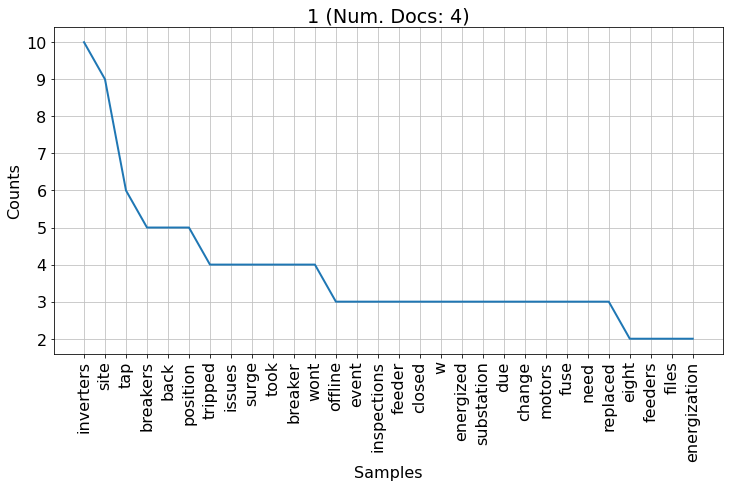

FreqDist({'inverters': 10, 'site': 9, 'tap': 6, 'breakers': 5, 'back': 5, 'position': 5, 'tripped': 4, 'issues': 4, 'surge': 4, 'took': 4, ...})

In [20]:
e.LABEL_COLUMN = 'Unsupervised_Pred_Asset'
e.visualize_freqPlot(LBL_CAT = 1)

## Visualize Word Clusters

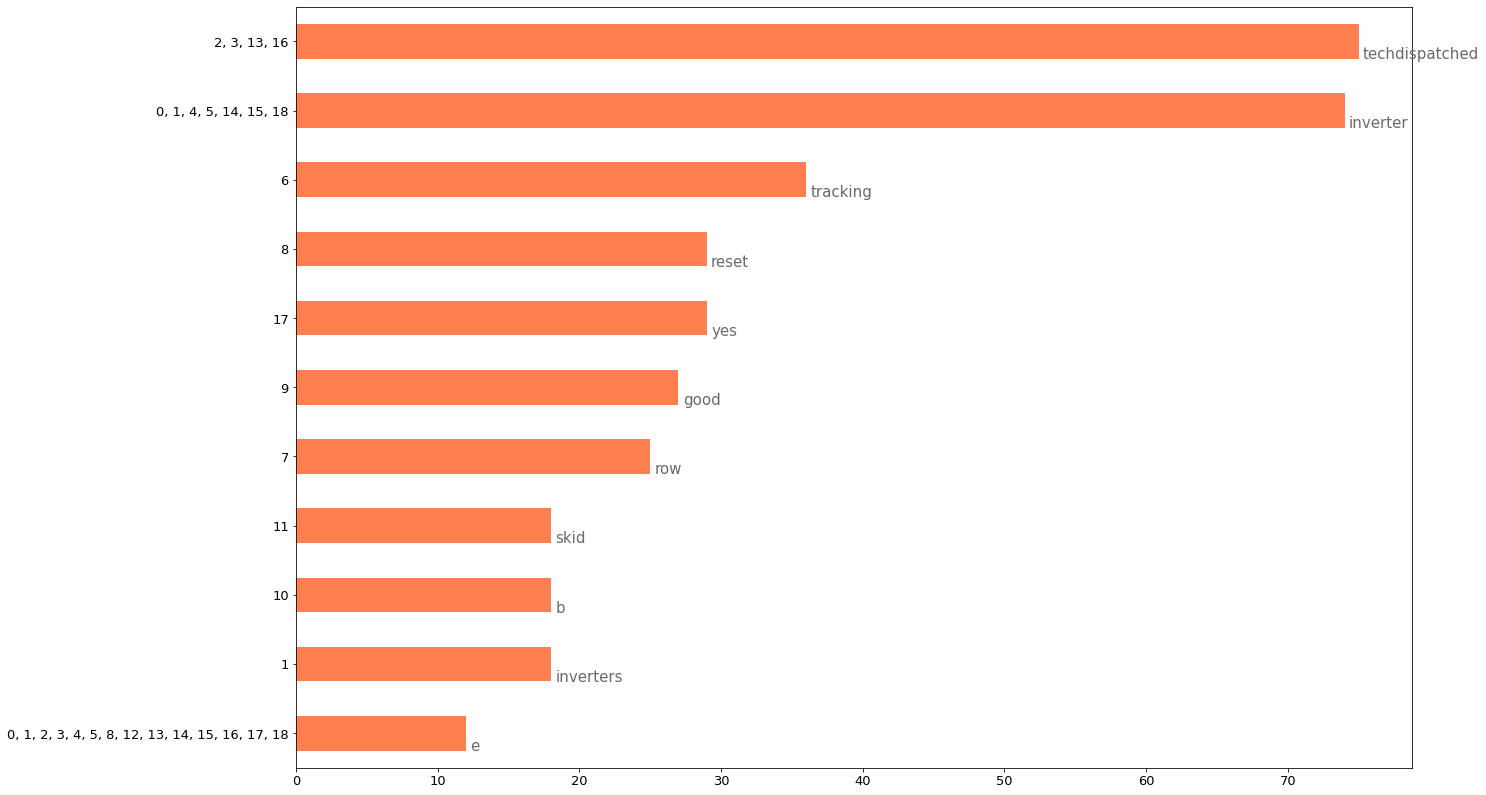

In [21]:
fig = e.visualize_document_clusters(min_frequency=10, DATA_COLUMN='CleanDesc')
plt.show()

### Seeing the popularity of `techdispatched`, one might consider adding `techdispatched` to the stopwords list